# **Pertemuan 2: Basic Concept of Probability Theory**
<hr>

### By: Andreas Syaloom Kurniawan (552751)

In [6]:
# The note is written in english do to my class lecture notes was written in english, 
# therefore to make my english more fluent I also write this notebook in english.
# The code are based on R programming language

# Table of Contents
- [A. Discrete Random Variable Distribution](#a)
    - [A. 1 Binomial Distribution Function](#a.1)
    - [A. 2 Hypergeometric Distribution Function](#a.2)
    - [A. 3 Poisson Distribution Function](#a.3)
- [B. Continous Random Variable Distribution](#b)
    - [B. 1 Uniform Distribution Function](#b.1)
    - [B. 2 Normal Distribution Function](#b.2)
    - [B. 3 Gamma Distribution Function](#b.2)

*Unfortunately, under github the link for the table of contents doesnt work, hence you need to scroll to the part if you want to go to a specific part of the note.*

In [7]:
support <- 1:40
sample <- rbinom(length(support), 1, 0.1)
support[sample==1]

[1]  7  8 15 36

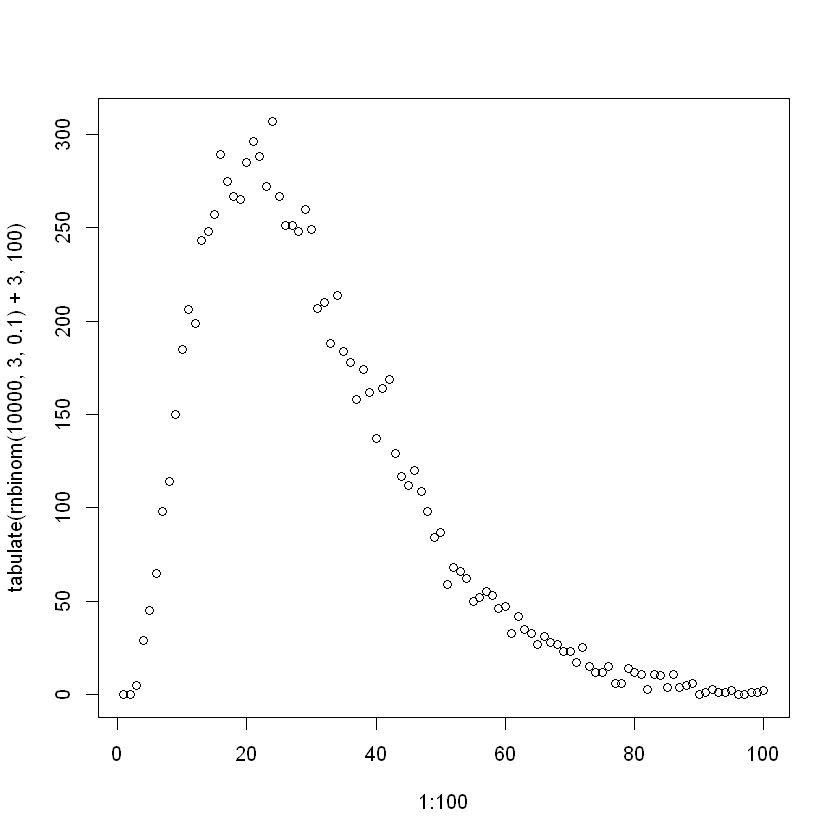

In [8]:
plot(1:100, tabulate(rnbinom(10000,3,0.1)+3,100))

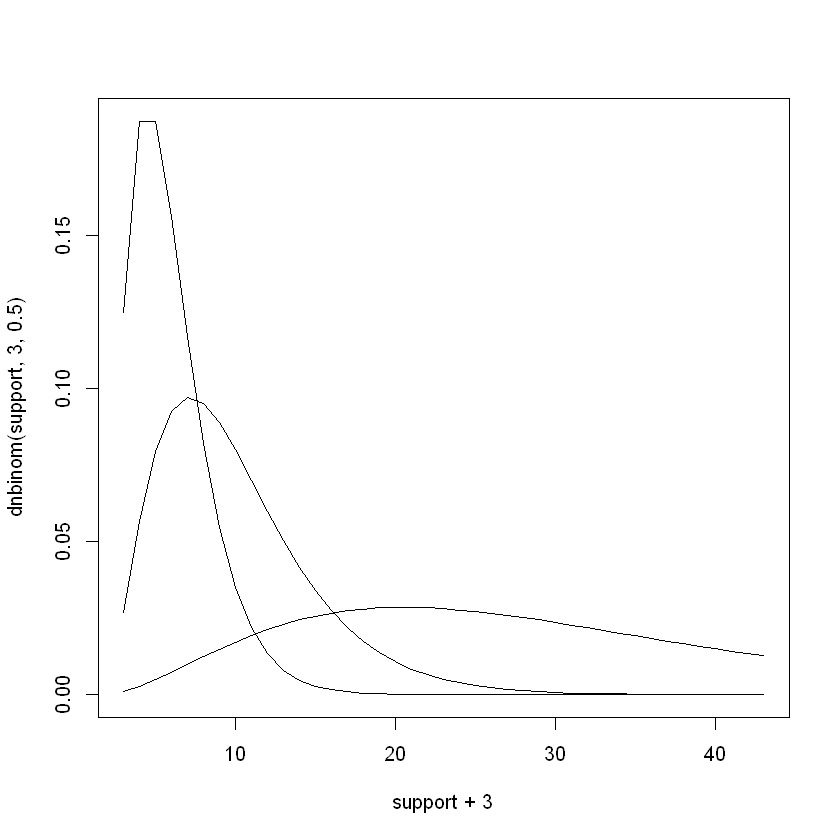

In [4]:
support <- 0:40
plot(support+3, dnbinom(support,3,0.5), type="l")
points(support+3, dnbinom(support,3,0.3), type="l")
points(support+3, dnbinom(support,3,0.1), type="l")

In [5]:
# Making experiment in R
We could make any experiment in R using `sample` function. 

ERROR: Error in parse(text = input): <text>:2:4: unexpected symbol
1: # Making experiment in R
2: We could
      ^


In [ ]:
First example we can run (roll) a dice with six independent sided (or any you can set as you wish), and use as many trials as we need by modifying the `size` and then we could also specify the replacement mode by `TRUE` or `FALSE`. The default is `TRUE`.

In [ ]:
sample(6, size = 30, replace = TRUE)

In [ ]:
Another example is to make experiment whether rain will come or not come. This will be very helpful when we discuss about binomial distribution. From each trial the outcomes are `rain` or `not rain`. We want the trial 100 times. We could do that by setting the outcome value in a vectors `c('rain', 'not rain')`.

In [ ]:
sample(c('rain', 'not rain'), size = 30, replace = TRUE)

In [ ]:
The other experiment that we can do is pick `n` number from an interval. 
Lets say we are on a flight of Cathay Pacific on Boeing 777-367(ER) flying from Frankfurt International Airport (FRA) to Hongkong International Airport (HKIA).
And we want to survey the passengger on economic class. We want to take a random number from the passanger number. Suppose there is 201 economics passangger from seat number 95 to 235.

In [ ]:
sample(95:235, size = 20, replace= TRUE)

In [ ]:
However, we just found that the seating number is not like that. The seat number is from row 39 to 72. 

In [ ]:
# Set the row numbers
rows <- 39:72

# Set the seat columns
columns <- LETTERS[c(1:11)]  # A to K, skipping 'I' to follow airline conventions

# Create all possible seat combinations
seats <- expand.grid(Row = rows, Seat = columns)

# Combine into seat labels (e.g., "39A", "40B", etc.)
seats$SeatLabel <- paste0(seats$Row, seats$Seat)

# Sample passengers (e.g., selecting 10 random passengers)
set.seed(123)  # Set seed for reproducibility
sampled_seats <- seats[sample(nrow(seats), 10), ]

# Print the sampled seats
print(sampled_seats)

In [ ]:
 pbinom(9, size=12, prob=1/6) 

## **A. Discrete Random Variable**<a class="anchor" id="a"></a>
<hr>

## **A.1 Binomial Distribution Function**<a class="anchor" id="a"></a>
## **A.2 Hypergeometric Distribution Function**<a class="anchor" id="a"></a>
## **A.3 Poisson Distribution Function**<a class="anchor" id="a"></a>

In [ ]:
pbinom(9, size=12, prob=1/6) - pbinom(6, size=12, prob=1/6)
diff(pbinom(c(6,9), size = 12, prob = 1/6)) 

In [ ]:
library(distr)
X <- Binom(size = 10, prob = 1/12)
X

In [ ]:
d(X)(1) # pmf of X evaluated at x = 1
p(X)(2) # cdf of X evaluated at x = 2

In [ ]:
library(distrEx)
E(X)
E(3 * X + 4)

In [ ]:
library(ggplot2)
library(tidyr)
set.seed(2025)

babies <- data.frame('data' = rpois(365, 4.5))

babies %>% ggplot() +
  geom_histogram(aes(x = data,
                     y = stat(count / sum(count)),
                     fill = data == 6),
                 binwidth = 1,
                 color = 'black',) +
  scale_x_continuous(breaks = 0:10) + 
  labs(x = 'Number of babies born per period',
       y = 'Proportion',
       title = '365 simulated births in a hospital with Pois(lambda = 4.5)') +
  theme_bw()

In [ ]:
qbinom(0.95,1000,1/2)

In [ ]:
# Define the x values
x <- seq(-10, 110, length.out = 1000)

# Define the PDF function
f_x <- ifelse(x >= 0 & x <= 100, 1/100, 0)

# Plot the function
plot(x, f_x, type = "l", lwd = 2, col = "blue",
     xlab = "x", ylab = "f_X(x)", main = "Uniform Distribution U(0,100)",
     ylim = c(0, 0.02))

# Add horizontal line for the density within [0,100]
lines(c(0, 100), c(1/100, 1/100), col = "red", lwd = 2)

# Add vertical dashed lines at boundaries
abline(v = 0, lty = 2, col = "black")
abline(v = 100, lty = 2, col = "black")

In [ ]:
library(ggplot2)

# Create a dataframe for plotting
df <- data.frame(
  x = c(-10, 0, 0, 100, 100, 110),
  y = c(0, 0, 1/100, 1/100, 0, 0)
)

# Plot the density function
ggplot(df, aes(x, y)) +
  geom_line(color = "blue", size = 1) +
  geom_segment(aes(x = 0, xend = 100, y = 1/100, yend = 1/100), color = "red", size = 1) +
  geom_vline(xintercept = c(0, 100), linetype = "dashed") +
  labs(title = "Uniform Distribution U(0,100)", x = "x", y = "f_X(x)") +
  theme_minimal()

In [ ]:
To simulate one exam score we would use the following code. You could save the results in another variable for use.

In [ ]:
set.seed(2025)
dat <-  runif(n = 100, min = 0, max = 100)
mean(dat)  

In [ ]:
hist(dat)

In [ ]:
And provide a histogram of the data to see the frequency of occurence. (You can play the results to see what happens is you lower the sample size or raise it to 5000.)


In [ ]:
# COntinous Distribution

In [ ]:
f <- function(x) 3 * x^2
integrate(f, lower = 0.14, upper = 0.71)

In [ ]:
set.seed(1)
rgamma(n = 5, shape = 3, scale = 2)

set.seed(1)
rgamma(n = 5, shape = 3, rate = 0.5)

In [ ]:
set.seed(1)
x <- rgamma(n = 1000, shape = 3, scale = 2)
mean(x)

In [ ]:
set.seed(1)
x <- rgamma(n = 1000, shape = 3, rate = 0.5)
mean(x)

## **B. Continous Random Variable**<a class="anchor" id="a"></a>
<hr>

## **B.1 Uniform Distribution Function**<a class="anchor" id="a"></a>
## **B.2 Normal Distribution Function**<a class="anchor" id="a"></a>
## **B.3 Gamma Distribution Function**<a class="anchor" id="a"></a>

In [ ]:
# dbinom(k, n, p)
# pbinom(k, n, p)
# qbinom(P, n, p)
# rbinom(n, N, p)

In [ ]:
# Description
# Density, distribution function, quantile function and random generation for the Poisson distribution with parameter lambda.
# dpois(x, lambda, log = FALSE) # Density (Probability Mass Function)
# ppois(q, lambda, lower.tail = TRUE, log.p = FALSE) # Cumulative Distribution Function

In [ ]:
dhyper(x, m, n, k, log = FALSE)
phyper(q, m, n, k, lower.tail = TRUE, log.p = FALSE)
qhyper(p, m, n, k, lower.tail = TRUE, log.p = FALSE)
rhyper(nn, m, n, k)

In [ ]:
    dnorm()
    pnorm()
    qnorm()
    rnorm()

In [ ]:
d<distribution>: Returns the density (PDF) at a given value.
p<distribution>: Returns the cumulative probability up to a given value (CDF).
q<distribution>: Returns the quantile (inverse CDF) for a given probability.
r<distribution>: Generates random samples from the distribution.

In [ ]:
dunif(x, min = 0, max = 1, log = FALSE)
punif(q, min = 0, max = 1, lower.tail = TRUE, log.p = FALSE)
qunif(p, min = 0, max = 1, lower.tail = TRUE, log.p = FALSE)
runif(n, min = 0, max = 1)

$f(k; \lambda) = \Pr(X=k) = \frac{\lambda^k e^{-\lambda}}{k!},$

where
* $k$ is the number of occurrences $(k = 0, 1, 2, \dots)$
* $e$ is Euler's number $(e \approx 2.71828)$
* $k!$ is the factorial, $k! = k(k-1) \dots (3)(2)(1)$.

A random variable $X$ that is gamma-distributed with shape $\alpha$ and scale $\theta$ is denoted by
$$
X \sim \Gamma(\alpha, \theta).
$$
The probability density function using the shape-scale parametrization is
$$
f(x; \alpha, \theta) = \frac{x^{\alpha-1} e^{-x/\theta}}{\theta^\alpha \Gamma(\alpha)}
$$
for $x > 0$ and $\alpha, \theta > 0$.

Here $\Gamma(\alpha)$ is the gamma function evaluated at $\alpha$.

The cumulative distribution function is the regularized gamma function:
$$
F(x; \alpha, \theta) = \int_0^x f(u; \alpha, \theta) \, du = \frac{\gamma(\alpha, \frac{x}{\theta})}{\Gamma(\alpha)},
$$
where $\gamma(\alpha, x)$ is the lower incomplete gamma function.


$ \Huge f(k, n, p) = \Pr(X = k) = \binom{n}{k} p^k (1-p)^{n-k} $

$ \Huge \binom{n}{k} = \frac{n!}{k!(n-k)!}. $

$ F(k; n, p) = \Pr(X \leq k) = \sum_{i=0}^{\lfloor k \rfloor} \binom{n}{i} p^i (1-p)^{n-i} $

$p_X(k) = \Pr(X = k) = \frac{\binom{K}{k} \binom{N-K}{n-k}}{\binom{N}{n}},$

In [ ]:
#######################################################################################
## GENERATING ALL THE POSSIBLE POSSIBILITIES FOR TOSSING A SINGLE COINS FOUR TIMES
#######################################################################################
# Define the possible outcomes for a single coin flip H=Head, T=Tail

* Second, we will summary all the possibilities of head count and summary their probability

In [ ]:
#######################################################################################
## PLOTTING PROBABILITY MEAN FUNCTION (PMF) OF A DISCRETE RANDOM VARIABLE
#######################################################################################

# Now plot using ggplot2 and ggtheme (ggtheme is libarary for some nice theme - here we use the economist theme).
library(ggplot2)
library(ggthemes)

options(repr.plot.width=20, repr.plot.height=8) # this is just to make the plots wider (extend to the end of laptop display) 

ggplot(data = probability_summary, aes(x = HeadsCount, y = Probability)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(x = "Number of Heads", y = "Probability", title = "Probability Distribution of Heads Count") +
  theme_economist(base_size = 30, dkpanel=TRUE)

In [ ]:
#######################################################################################
## PLOTTING CUMMULATIVE DISTRIBUTION FUNCTION (CDF) OF A DISCRETE RANDOM VARIABLE
#######################################################################################

* SIMULATION 2: We can make a more dynamic simulation where we can set more trials and more coin flips

In [ ]:
#######################################################################################
## PLOTTING CUMMULATIVE DISTRIBUTION FUNCTION (CDF) OF A DISCRETE RANDOM VARIABLE
#######################################################################################
library(ggplot2)
library(ggthemes)

In [ ]:
#############################################################################################################################
## CALCULATING EXPECTATION AND VARIANCE OF A PDF $f(x) = \lambda x^{-\lambda x}$ where $\lambda = \frac{1}{3}$
#############################################################################################################################

In [ ]:
# Reference
<hr>

* Baclawski, K. (2008). Introduction to probability with R. CRC Press.
* Kerns, J. G. (2010). Introduction to Probability and Statistics Using R. Lulu.com
* https://pubs.wsb.wisc.edu/academics/analytics-using-r-2019/uniform-continuous-version.html
* https://bookdown.org/gabriel_butler/ECON41Labs/tutorial-5-the-poisson-distribution.html#simulating-costs-of-car-accidents

In [ ]:
############################################################################
#            HYPERGEOMETRIC DISTRIBUTION IN R
############################################################################
# X- number of successes m in n draws without replacement from a finite 
#    population of size N which contains exactly M successes
############################################################################
#example: a box contains 20 red , 12 blue balls.
#         let red balls be a 'success', blue a 'failure' 
#         we are drawing 10 balls without replacement and  
#         count the number of red balls (successes).

r=20
b=12
n=10

############################################################################
# generate a hypergeometric random variable (r,b,n)
# and save it in a variable X
############################################################################
# one realization from negative binomial distribution 

rhyper(1,r,b,n)

(X=rhyper(10000,r,b,n))
#print the variable X values

############################################################################




############################################################################
#Make a histogram using the generated variable X
############################################################################
#Once we have generated the hypergeomteric random variable (r,b,n)
#we can make plots, calculate quantiles
#check the documentation about hist function

?hist

#use nclass to define the number of bins of the histogram
hist(X,nclass=25,col='purple',main='Histogram of X')
hist(X,nclass=100,col='purple',main='Histogram of X')




############################################################################
# Make plots against a predifined grid
# using dhyper
############################################################################

#define the grid
grid   =  seq(0, 10, by = 1)

#evaluate log binomial against the defined grid and make a plot
evalXlog=dhyper(grid, r, b,n, log = TRUE)
plot(grid, evalXlog, type = "l", ylab = "log density",
      main = "log density from dhyper", col='red')

#evaluate binomial against the defined grid and make a plot
evalX=dhyper(grid, r,  b,n, log = FALSE)
plot(grid, evalX,col='blue',type = "l",  ylab = " density",
      main = "density from dhyper")

############################################################################






############################################################################
# dhyper is evaluating the density, so we can use it to calculate
# probabilities that X is exactly some value, or it is smaller or bigger
# Example: Calculate the probability that there were 5 red balls in 10 draws
# that is we need to calculate 
# P(X=5)= (factorial(r)/(factorial(x)*factorial(r-x) ) * factorial(b)/( factorial(n-x) *factorial(b-n+x)))/ (factorial(r+b)/ (factorial(n)*factorial(r+b-n) ))
############################################################################


#Calculate P(X=5) using the hard coded PMF of binomial
 x=5
(probXis2fla= (factorial(r)/(factorial(x)*factorial(r-x) ) * factorial(b)/( factorial(n-x) *factorial(b-n+x)))/ (factorial(r+b)/ (factorial(n)*factorial(r+b-n) )))



#Calculate P(X=2) using the R function dbinom
(probXis2= dhyper(x, r, b,n, log = F))
############################################################################

############################################################################
##calculate P( 6 <=X<= 8)
#Several ways to do it! I will show you 3 today!
############################################################################
#1.
#use the hard coded PMF of negative binomial
(probXbtw6and8fla= (factorial(r)/(factorial(6)*factorial(r-6) ) * factorial(b)/( factorial(n-6) *factorial(b-n+6)))/ (factorial(r+b)/ (factorial(n)*factorial(r+b-n) ))+
                   (factorial(r)/(factorial(7)*factorial(r-7) ) * factorial(b)/( factorial(n-7) *factorial(b-n+7)))/ (factorial(r+b)/ (factorial(n)*factorial(r+b-n) ))+
                   (factorial(r)/(factorial(8)*factorial(r-8) ) * factorial(b)/( factorial(n-8) *factorial(b-n+8)))/ (factorial(r+b)/ (factorial(n)*factorial(r+b-n) )))


#2.
#We can write a parametrized function that can be recalled each time we need it.
#This techique will be helful when you work when the distribution function
#such as dbinom not available in R
#This is just a more useful technique than the first one.
#It makes it easier to calculate much more probabilities like P( 6 <=X<= 17 )

myDistHyper=function(numb,r,b,n){
    (factorial(r)/(factorial(numb)*factorial(r-numb) ) * factorial(b)/( factorial(n-numb) *factorial(b-n+numb)))/ (factorial(r+b)/ (factorial(n)*factorial(r+b-n) ))
}

(probXbtw6and8MyFla=myDistHyper(6,r,b,n)+myDistHyper(7,r,b,n)+myDistHyper(8,r,b,n))

#or we can write a for loop to make a summation

probXbtw6and8MyFla2=0
for (i in (6:8)){
probXbtw6and8MyFla2=probXbtw6and8MyFla2+myDistHyper(i,r,b,n)
}

# Note:
# In general R is very slow when it comes to using for loop
# There are more sofisticated functions such as apply, sapply, lapply..
# that can be used to avoid the for loop. We will get there soon.

#3.
#use dhyper
#provided a vector 6:8
#dhyper will calculate probabilities for each values in the vector 6:8

dhyper(6:8, r, b,n, log = F)

#so to calculate prob P( 6 <=X<= 8) we will need to sum up probabilities 
#returned by dhyper evaluated at each of the values 6:8

(probXbtw6and8=sum(dhyper(6:8, r, b,n, log = F)))

############################################################################
#calculate 75 percentile
############################################################################

qhyper(0.75,r,b,n)

############################################################################
#END
############################################################################





In [ ]:
############################################################################
#              BINOMIAL DISTRIBUTION IN R
############################################################################
# X- number of successes in n trials 
############################################################################
#example: Each of the students in today's tutorial toss a coin.
#         Let heads denote a success.Count the number of heads (successes) in
#         number-of-students number of trials.

#set the working directory
#be careful with this path, it will change according your 
#personal computer folder structure
setwd('Z:/STAT380/tutorials/week1')

#binomial distribution functions in R are built in the 'base' package
#so we do not need any additional package

############################################################################
# Each of the students in today's tutorial is tossing a coin
# We denote 'success' to be head, 'failure' is tail
############################################################################
n=17
p=1/2


############################################################################
# generate a binomial random variable (n,p)
# and save it in a variable X
############################################################################
# one realization from binomial distribution 
rbinom(1,n,p)

#use the ? before the function name to call help file
#about that function

?rbinom

X=rbinom(10000,n,p)
#print the variable X values

X

#another way to print the output (variable X values) is 

(X=rbinom(10000,n,p))
############################################################################

############################################################################
#Make a histogram using the generated variable X
############################################################################
#Once we have generated the binomial random variable
#we can make plots, calculate quantiles
#check the documentation about hist function

?hist

#use nclass to define the number of bins of the histogram
hist(X,nclass=25,col='purple',main='Histogram of X')
hist(X,nclass=100,col='purple',main='Histogram of X')

############################################################################
# Make plots against a predifined grid
# using dbinom
############################################################################

#define the grid
grid   =  seq(0, 17, by = 1)

#evaluate log binomial against the defined grid and make a plot
evalXlog=dbinom(grid, n, p, log = TRUE)
plot(grid, evalXlog, type = "l", ylab = "log density",
      main = "log density from dbinom", col='red')

#evaluate binomial against the defined grid and make a plot
evalX=dbinom(grid, n, p, log = FALSE)
plot(grid, evalX,col='blue',type = "l",  ylab = " density",
      main = "density from dbinom")

############################################################################



############################################################################
# dbinom is evaluating the density, so we can use it to calculate
# probabilities that X is exactly some value, or it is smaller or bigger
# Example: Calculate the probability that there were 2 successes
# that is we need to calculate P(X=2)= ( n!/2!(n-2)!) * p^2*(1-p)^(n-2) 
############################################################################


#Calculate P(X=2) using the hard coded PMF of binomial
(probXis2fla= factorial(n)/(factorial(2)*factorial(n-2))* p^2*(1-p)^(n-2) )


#Calculate P(X=2) using the R function dbinom
(probXis2=dbinom(2, n, p, log = F))
############################################################################




############################################################################
##calculate P( 6 <=X<= 8)
#Several ways to do it! I will show you 3 today!
############################################################################
#1.
#use the hard coded PMF of binomial
(probXbtw6and8fla= (factorial(n)/(factorial(6)*factorial(n-6)))* p^6*(1-p)^(n-6) +
                   (factorial(n)/(factorial(7)*factorial(n-7)))* p^7*(1-p)^(n-7) +
                   (factorial(n)/(factorial(8)*factorial(n-8)))* p^8*(1-p)^(n-8))

#2.
#We can write a parametrized function that can be recalled each time we need it.
#This techique will be helful when you work when the distribution function
#such as dbinom not available in R
#This is just a more useful technique than the first one.
#It makes it easier to calculate much more probabilities like P( 6 <=X<= 17 )

myDistBinom=function(numb,n,p){
    (factorial(n)/(factorial(numb)*factorial(n-numb)))* p^numb*(1-p)^(n-numb)
}

(probXbtw6and8MyFla=myDistBinom(6,n,p)+myDistBinom(7,n,p)+myDistBinom(8,n,p))

#or we can write a for loop to make a summation

probXbtw6and8MyFla1=0
for (i in (6:8)){
probXbtw6and8MyFla1=probXbtw6and8MyFla+myDistBinom(i,n,p)
}

# Note:
# In general R is very slow when it comes to using for loop
# There are more sofisticated functions such as apply, sapply, lapply..
# that can be used to avoid the for loop. We will get there soon.

#3.
#use dbinom
#provided a vector 6:8
#dbinom will calculate probabilities for each values in the vector 6:8

dbinom(6:8, n, p, log = F)

#so to calculate prob P( 6 <=X<= 8) we will need to sum up probabilities 
#returned by dbinom evaluated at each of the values 6:8

(probXbtw6and8=sum(dbinom(6:8, n, p, log = F)))

############################################################################
#calculate 75 percentile
############################################################################

qbinom(0.75,n,p)
 
############################################################################
#END
############################################################################






m <- 10; n <- 7; k <- 8
x <- 0:m
rbind(phyper(x, m, n, k), dhyper(x, m, n, k))
all(phyper(x, m, n, k) == cumsum(dhyper(x, m, n, k)))# FALSE
## Error :
signif(phyper(x, m, n, k) - cumsum(dhyper(x, m, n, k)), dig=3)

In [ ]:
m <- 10; n <- 7; k <- 8
x <- 0:m
rbind(phyper(x, m, n, k), dhyper(x, m, n, k))
all(phyper(x, m, n, k) == cumsum(dhyper(x, m, n, k)))# FALSE
## Error :
signif(phyper(x, m, n, k) - cumsum(dhyper(x, m, n, k)), dig=3)